# 📦 Desafio 05 - Análise Exploratória com Boxplot

Neste desafio do #7DaysOfCode, o objetivo é analisar a distribuição de empréstimos mensais por ano, comparando dois grupos de usuários: alunos de graduação e alunos de pós-graduação. Utilizaremos gráficos de boxplot para observar padrões, variações e possíveis outliers nos dados de 2010 a 2020.

Vamos começar pela preparação dos dados!

In [1]:
import pandas as pd

# Importando o dataset completo gerado no desafio04
df = pd.read_csv('../desafio04/dataset_completo.csv')

# Visualizando as primeiras linhas
df.head(3)

C:\Users\Jhonny\AppData\Local\Temp\ipykernel_19108\256611724.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../desafio04/dataset_completo.csv')


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_cdu
0,709684,L095049,NaN,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2.008023e+09,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,709685,L167050,NaN,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2.008023e+09,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
2,709686,2006017618,2010-01-26 08:07:01.738,2010-01-04 08:08:44.081,2010-02-25 07:36:25.800,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas


## 🎓 Filtrando apenas alunos de Graduação e Pós-Graduação

Vamos focar nossa análise em dois grupos principais de usuários: alunos de graduação e de pós-graduação.


In [2]:
usuarios_validos = ['ALUNO DE GRADUAÇÃO', 'ALUNO DE PÓS-GRADUAÇÃO']
df_filtrado = df[df['tipo_vinculo_usuario'].isin(usuarios_validos)].copy()
df_filtrado['tipo_vinculo_usuario'].value_counts()

tipo_vinculo_usuario
ALUNO DE GRADUAÇÃO        1771903
ALUNO DE PÓS-GRADUAÇÃO     320074
Name: count, dtype: int64

## 📚 Identificando a coleção com maior número de empréstimos

O objetivo é focar a análise na coleção mais emprestada, conforme sugerido pelo enunciado.


In [3]:
df_filtrado['colecao'].value_counts()

colecao
Acervo Circulante                        1899356
Multimeios                                  5211
Monografias                                 3850
Dissertações                                2086
Obras de Referência                         1747
Publicações de Autores do RN                 799
Teses                                        612
Publicações da UFRN                          587
Folhetos                                     240
Trabalho Acadêmico                           104
Necessidades Educacionais Específicas        103
Eventos                                       83
Coleção Mossoroense                           40
Coleção Zila Mamede                           26
Literatura de Cordel                          15
Obras Raras                                    6
Name: count, dtype: int64

In [5]:
colecao_principal = 'Acervo Circulante'
df_filtrado = df_filtrado[df_filtrado['colecao'] == colecao_principal].copy()
df_filtrado.value_counts()

id_emprestimo  codigo_barras  data_renovacao           data_emprestimo          data_devolucao              matricula_ou_siape  tipo_vinculo_usuario    id_exemplar  colecao            biblioteca                                                                                status_material  localizacao  classe_cdu        
709686         2006017618     2010-01-26 08:07:01.738  2010-01-04 08:08:44.081  2010-02-25 07:36:25.800     2.008112e+09        ALUNO DE PÓS-GRADUAÇÃO  195347.0     Acervo Circulante  Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ  - Macaiba  REGULAR          640          Ciências aplicadas    1
784751         2009043987     2010-06-29 21:14:17.770  2010-05-31 16:33:39.685  2010-07-19 14:23:46.000     2.010108e+09        ALUNO DE PÓS-GRADUAÇÃO  277416.0     Acervo Circulante  Biblioteca Central Zila Mamede                                                            REGULAR          622          Ciências aplicadas    1
784824         L15414

## 📆 Agrupando empréstimos mensais por ano

A ideia agora é transformar os dados para que possamos comparar, ano a ano, como se distribuem os empréstimos realizados mensalmente por cada tipo de usuário.

In [6]:
# Convertendo a coluna data_emprestimo para datetime, se ainda não estiver
df_filtrado['data_emprestimo'] = pd.to_datetime(df_filtrado['data_emprestimo'], errors='coerce')

# Criando colunas auxiliares de ano e mês
df_filtrado['ano'] = df_filtrado['data_emprestimo'].dt.year
df_filtrado['mes'] = df_filtrado['data_emprestimo'].dt.month

# Filtrando período de interesse: 2010 a 2020
df_filtrado = df_filtrado[(df_filtrado['ano'] >= 2010) & (df_filtrado['ano'] <= 2020)]

# Agrupando por ano, mês e tipo de vínculo
emprestimos_mensais = df_filtrado.groupby(['tipo_vinculo_usuario', 'ano', 'mes'])['id_emprestimo'].count().reset_index()

# Renomeando para facilitar
emprestimos_mensais.columns = ['tipo_vinculo_usuario', 'ano', 'mes', 'quantidade_emprestimos']

# Visualizando
emprestimos_mensais.head()

,tipo_vinculo_usuario,ano,mes,quantidade_emprestimos
0,ALUNO DE GRADUAÇÃO,2010,1,2996
1,ALUNO DE GRADUAÇÃO,2010,2,7769
2,ALUNO DE GRADUAÇÃO,2010,3,15275
3,ALUNO DE GRADUAÇÃO,2010,4,12430
4,ALUNO DE GRADUAÇÃO,2010,5,12164


## 📊 Criando boxplots comparativos

Com os dados agrupados, vamos utilizar o gráfico de boxplot para visualizar a distribuição mensal dos empréstimos ao longo dos anos, para cada tipo de usuário (Graduação e Pós-Graduação).

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo mais profissional e limpo
sns.set_theme(style="whitegrid", palette="pastel")

def plot_boxplot_melhorado(df, titulo, cor='skyblue'):
    plt.figure(figsize=(14, 6))
    ax = sns.boxplot(x='ano', y='quantidade', data=df, color=cor, width=0.6, fliersize=4, linewidth=1)
    
    # Ajustes estéticos
    ax.set_title(titulo, fontsize=16, weight='bold')
    ax.set_xlabel("Ano", fontsize=12)
    ax.set_ylabel("Quantidade Mensal de Empréstimos", fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    
    # Remover as bordas superiores e laterais
    sns.despine()
    
    plt.tight_layout()
    plt.show()


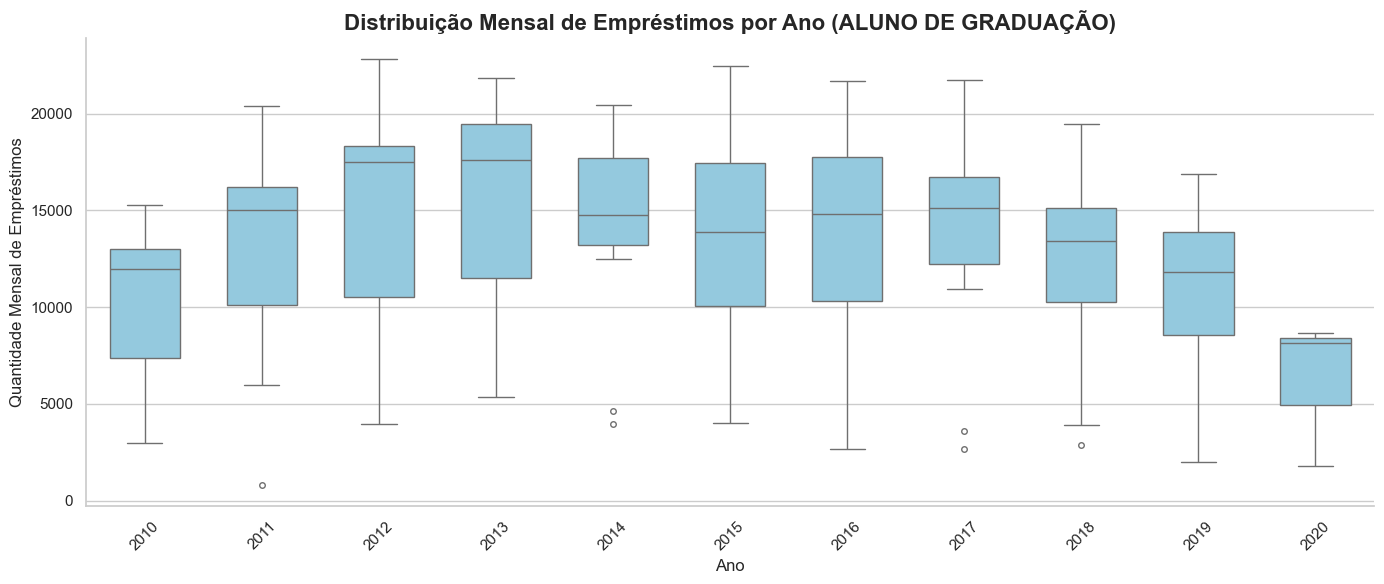

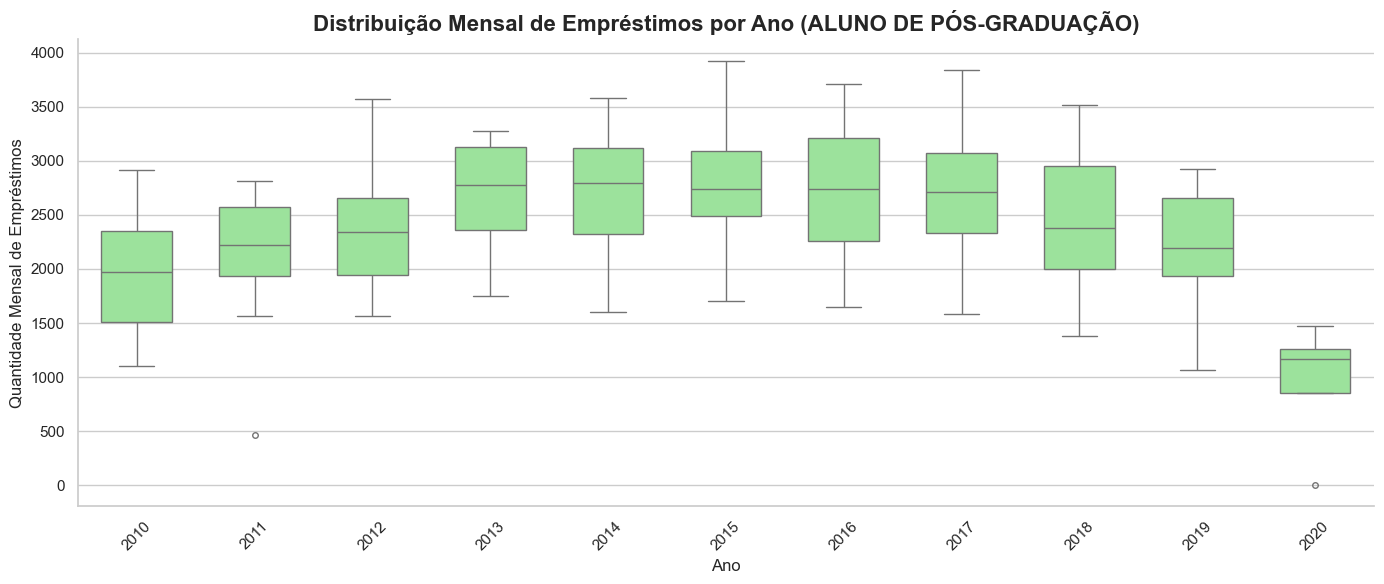

In [14]:
df_grad_box = emprestimos_mensais[emprestimos_mensais['tipo_vinculo_usuario'] == 'ALUNO DE GRADUAÇÃO'].copy()
df_grad_box = df_grad_box.rename(columns={'quantidade_emprestimos': 'quantidade'})

df_pos_box = emprestimos_mensais[emprestimos_mensais['tipo_vinculo_usuario'] == 'ALUNO DE PÓS-GRADUAÇÃO'].copy()
df_pos_box = df_pos_box.rename(columns={'quantidade_emprestimos': 'quantidade'})

plot_boxplot_melhorado(df_grad_box, 'Distribuição Mensal de Empréstimos por Ano (ALUNO DE GRADUAÇÃO)', cor='skyblue')
plot_boxplot_melhorado(df_pos_box, 'Distribuição Mensal de Empréstimos por Ano (ALUNO DE PÓS-GRADUAÇÃO)', cor='lightgreen')


## 📊 Análise Final - Boxplot por Tipo de Usuário

A análise da distribuição mensal de empréstimos entre os anos de **2010 a 2020** nos permite compreender o comportamento dos dois principais públicos da biblioteca: **alunos de graduação** e **alunos de pós-graduação**.

---

### 🎓 Alunos de Graduação

- 📈 **Crescimento consistente de 2010 a 2013**, com elevação progressiva da mediana e aumento da variabilidade mensal.
- ⚖️ **Estabilização entre 2014 e 2017**, com redução da dispersão dos dados e manutenção de um padrão elevado de uso.
- 📉 **Queda gradual em 2018 e 2019**, indicando perda de engajamento ou possíveis mudanças institucionais.
- 🛑 **Queda brusca em 2020**, refletindo fortemente o impacto da **pandemia da COVID-19**.

> **Insight**: o grupo de graduação apresenta mais variações entre os meses, o que sugere necessidade de estratégias sazonais de incentivo à leitura e ao uso da biblioteca.

---

### 🎓 Alunos de Pós-graduação

- 🧩 **Volume de empréstimos menor e mais estável**, com caixas mais comprimidas e mediana consistente entre 2013 e 2017.
- 📉 **Leve declínio em 2018 e 2019**, mas em ritmo menos acentuado que o da graduação.
- 🛑 **Queda abrupta também em 2020**, confirmando uma causa externa generalizada.

> **Insight**: a pós-graduação mantém um padrão de uso mais previsível, o que pode facilitar a programação de recursos e serviços específicos para esse público.

---

### 📌 Considerações Gerais para a Diretoria

- O ano de **2013 foi o pico de utilização** para ambos os públicos, e pode ser usado como **ano de referência (baseline)** para projeções.
- A partir de **2017, inicia-se uma tendência de queda** que se agrava em 2020.
- **Recomenda-se investigação mais aprofundada** sobre os fatores que contribuíram para essa retração:
  - Mudanças no acervo?
  - Redução de campanhas institucionais?
  - Avanço de alternativas digitais?
  - Questões pedagógicas ou curriculares?

> Essa visualização reforça a importância de **monitorar continuamente os padrões de uso** e ajustar estratégias de forma dinâmica, considerando os diferentes perfis de usuários.

---

✅ **Próximo passo**: consolidar os insights e propor estratégias práticas baseadas nesses padrões — seja para políticas de acervo, marketing institucional ou gestão de recursos humanos.